In [4]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

dataset = pd.read_csv('C:/Users/ASUS/Downloads/water_potability.csv')
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [6]:
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
dataset = dataset.fillna(dataset.groupby('Potability').transform('mean'))
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,332.566990,392.449580,19.903225,66.539684,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658,1


In [9]:
df1 = np.array(dataset)[:,:-1]
newmin=0
newmax=1
mindata=df1.min()
maxdata=df1.max()
df1=((df1-mindata)*(newmax-newmin)/(maxdata-mindata))+newmin

In [10]:
data_normalisasi = pd.DataFrame(df1)
data_normalisasi.columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
data_normalisasi['Potability'] = np.array(dataset)[:,-1]
data_normalisasi

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000116,0.003346,0.339577,0.000119,0.006019,0.009217,0.000170,0.001421,0.000048,0.0
1,0.000061,0.002114,0.304277,0.000108,0.005464,0.009683,0.000248,0.000920,0.000074,0.0
2,0.000132,0.003662,0.325175,0.000151,0.005464,0.006837,0.000276,0.001085,0.000050,0.0
3,0.000136,0.003501,0.359618,0.000132,0.005829,0.005933,0.000301,0.001639,0.000076,0.0
4,0.000148,0.002958,0.293644,0.000107,0.005065,0.006507,0.000189,0.000523,0.000067,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.000076,0.003163,0.777122,0.000117,0.005879,0.008598,0.000227,0.001089,0.000072,1.0
3272,0.000128,0.003161,0.283041,0.000132,0.005432,0.006410,0.000325,0.001087,0.000046,1.0
3273,0.000154,0.002871,0.541517,0.000120,0.005432,0.007056,0.000180,0.001141,0.000054,1.0
3274,0.000084,0.003766,0.195728,0.000103,0.005432,0.006580,0.000182,0.001266,0.000077,1.0


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
correlation limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (3276, 10)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were

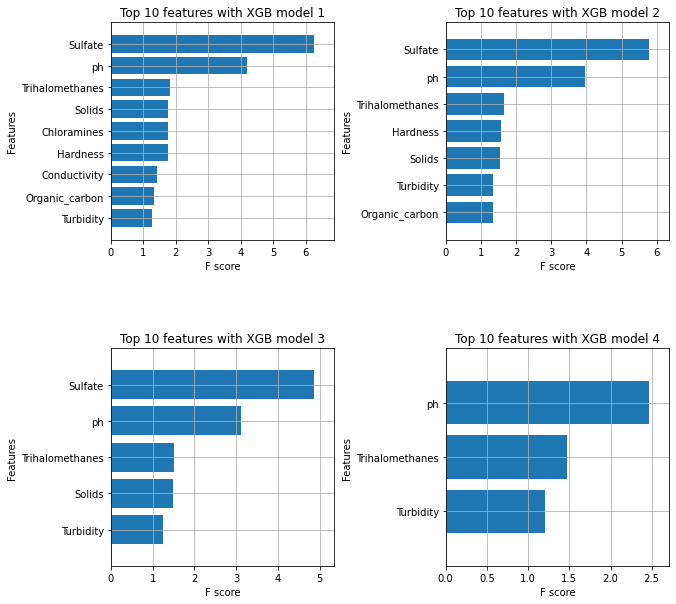

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 4 important features:
['Sulfate', 'ph', 'Trihalomethanes', 'Solids']
Total Time taken for featurewiz selection = 4 seconds
Output contains a list of 4 important features and a train dataframe


In [12]:
from featurewiz import featurewiz
features = featurewiz(data_normalisasi, target='Potability', corr_limit=0.70, 
                                verbose=2)


Hasil clustering:
 [1 0 0 ... 0 0 0]


<AxesSubplot:xlabel='Sulfate', ylabel='ph'>

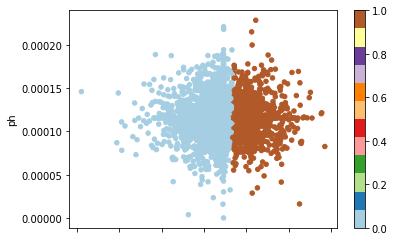

In [16]:
from sklearn.cluster import KMeans

data = data_normalisasi.loc[:,['Sulfate', 'ph']]
clustering = KMeans(n_clusters=2, init="random", n_init=1)
clusters=clustering.fit_predict(data)
print('\nHasil clustering:\n', clusters)
data.plot(x='Sulfate', y='ph', kind='scatter', c=clusters, colormap='Paired')


Hasil clustering:
 [0 0 0 ... 0 0 0]


<AxesSubplot:xlabel='Sulfate', ylabel='ph'>

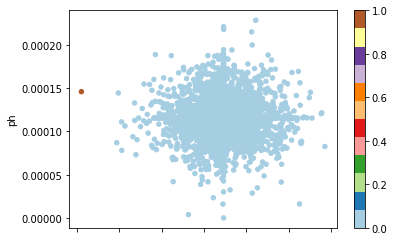

In [18]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

data = data_normalisasi.loc[:,['Sulfate', 'ph']]
clustering=AgglomerativeClustering(n_clusters=2, linkage='single')
clusters=clustering.fit_predict(data)
print('\nHasil clustering:\n', clusters)
data.plot(x='Sulfate', y='ph', kind='scatter', c=clusters, colormap='Paired')


Hasil clustering:
 [0 0 0 ... 0 0 0]


<AxesSubplot:xlabel='Sulfate', ylabel='ph'>

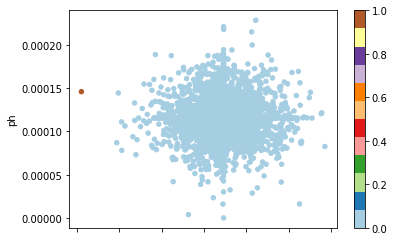

In [19]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

data = data_normalisasi.loc[:,['Sulfate', 'ph']]
clustering=AgglomerativeClustering(n_clusters=2, linkage='average')
clusters=clustering.fit_predict(data)
print('\nHasil clustering:\n', clusters)
data.plot(x='Sulfate', y='ph', kind='scatter', c=clusters, colormap='Paired')


Hasil clustering:
 [1 1 1 ... 1 1 1]


<AxesSubplot:xlabel='Sulfate', ylabel='ph'>

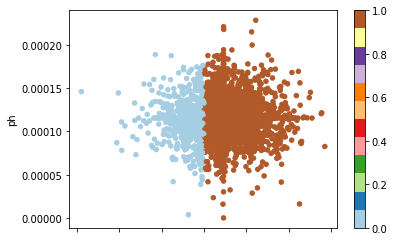

In [20]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

data = data_normalisasi.loc[:,['Sulfate', 'ph']]
clustering=AgglomerativeClustering(n_clusters=2, linkage='complete')
clusters=clustering.fit_predict(data)
print('\nHasil clustering:\n', clusters)
data.plot(x='Sulfate', y='ph', kind='scatter', c=clusters, colormap='Paired')